# Principle Component Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naiwen1997/IDNE-577-Machine-Learning/blob/master/Unsupervised%20Learning/Lecture%202%20Principle%20Component%20Analysis/PCA.ipynb)

In [4]:
# !pip install ucimlrepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features.to_numpy()
y = wine.data.targets.to_numpy()

In [10]:
np.unique(y)

array([1, 2, 3], dtype=int64)

In [5]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(np.shape(A))
print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

(178, 13)
np.shape(U) = (178, 13)
np.shape(sigma) = (13,)
np.shape(Vt) = (13, 13) 



In [6]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



In [8]:
PC={}
for i in range(13):
    PC[f"PC_{i}"] = Vt.T[:, i]

# project the data to the first and second principle component
W2 = Vt.T[:, :2]
X2D = A.dot(W2)

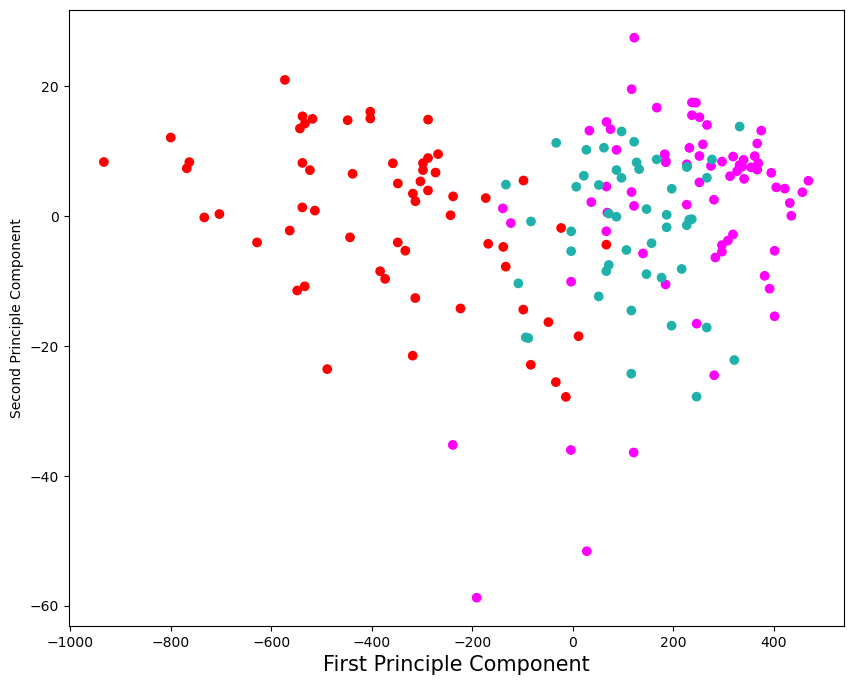

In [11]:
def colors(y):
    if y == 1:
        return "red"
    elif y == 2:
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

In [15]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
per_var = [36.2  19.21 11.12  7.07  6.56  4.94  4.24  2.68  2.22  1.93  1.74  1.3
  0.8 ] 

